## Making sense of Average user fallacy and Guassian correlation inequality

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

1) Generate correlated random variable with given mean and fixed standard deviation.  <br>
2) Calculate covariance matrix using cholesky decomposition. <br>
3) Correlated Data = mean + covariace * data <br>
4) Find how many points lie within K STD from mean for height weight and combination and compare them. 


In [221]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [223]:
# mean of height in cm and weight in lbs
mean = np.array([175, 190]) 
samples = 10000
correlation = 0.3
corr_matrix = np.array([[1.0, correlation], [correlation, 1.0]])

<IPython.core.display.Javascript object>

In [224]:
# Get covariance from correlation using cholesky decomposition.
# Covariance is square root of correlation
chol = np.linalg.cholesky(corr_matrix)

<IPython.core.display.Javascript object>

In [225]:
assert (
    ~np.isclose(chol @ np.transpose(chol), corr_matrix)
).sum() == 0, "Cholesky not working"

<IPython.core.display.Javascript object>

In [227]:
# generate correlated random variables with mean 0 and std 1
uncorr_data = np.random.randn(2, samples)
print(f"Correlation of randomly generated data - \n{np.corrcoef(uncorr_data)}")
# will correlate the random generated data using covariance
corr_data = np.reshape(mean, [2, 1]) + chol @ uncorr_data
print(f"Correlation of correlated data - \n{np.corrcoef(corr_data)}")

Correlation of randomly generated data - 
[[1.         0.01117562]
 [0.01117562 1.        ]]
Correlation of correlated data - 
[[1.         0.31229135]
 [0.31229135 1.        ]]


<IPython.core.display.Javascript object>

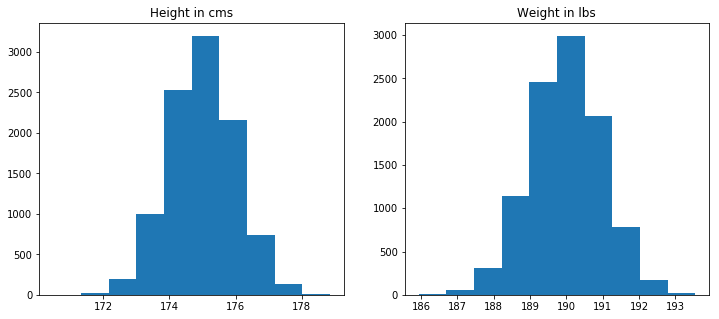

<IPython.core.display.Javascript object>

In [228]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(corr_data[0])
ax1.set_title("Height in cms")
ax2.hist(corr_data[1])
ax2.set_title("Weight in lbs")
fig.set_size_inches(12, 5)

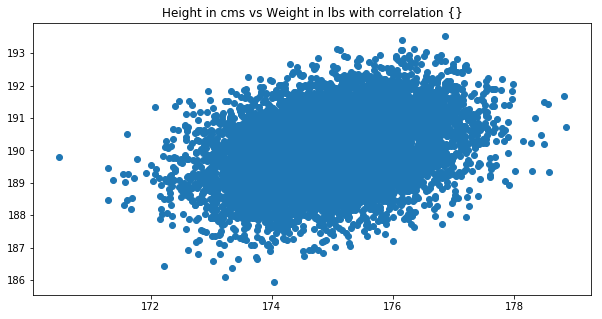

<IPython.core.display.Javascript object>

In [229]:
plt.figure(figsize=(10, 5))
plt.scatter(corr_data[0], corr_data[1])
plt.title("Height in cms vs Weight in lbs with correlation {}")

In [230]:
height_std, weight_std = np.std(corr_data[0]), np.std(corr_data[1])
height_mean, weight_mean = np.mean(corr_data[0]), np.mean(corr_data[1])
height_mean, height_std, weight_mean, weight_std

(174.99403231204286,
 1.0016632926090632,
 189.99273563520242,
 0.9961050146740399)

<IPython.core.display.Javascript object>

Weight and Height has different mean but same standard deviation. Loop through the data set and find points within 1 STD from mean.

In [231]:
k = 1
normal_height = (corr_data[0] > mean[0] - k) & (corr_data[0] < mean[0] + k)
normal_weight = (corr_data[1] > mean[1] - k) & (corr_data[1] < mean[1] + k)
normal_height_weight = normal_height & normal_weight

prob_normal_height = normal_height.sum() / samples
prob_normal_weight = normal_weight.sum() / samples
prob_normal_height_weight = normal_height_weight.sum() / samples

print(prob_normal_height, prob_normal_weight, prob_normal_height_weight)

0.6864 0.6914 0.4899


<IPython.core.display.Javascript object>

In [232]:
"Guassin correlation inequality is true" if prob_normal_height_weight > (
    prob_normal_height * prob_normal_weight
) else "Gaussian correlation inequality is false"

'Guassin correlation inequality is true'

<IPython.core.display.Javascript object>

Guassian Correlation Inequality for different Correlation Factors

In [233]:
samples = 100000
rhs, lhs = [], []
for correlation in np.arange(0, 1, 0.1):
    corr_matrix = np.array([[1.0, correlation], [correlation, 1.0]])
    chol = np.linalg.cholesky(corr_matrix)

    uncorr_data = np.random.randn(2, samples)
    corr_data = np.reshape(mean, [2, 1]) + chol @ uncorr_data

    normal_height = (corr_data[0] > mean[0] - k) & (corr_data[0] < mean[0] + k)
    normal_weight = (corr_data[1] > mean[1] - k) & (corr_data[1] < mean[1] + k)
    normal_height_weight = normal_height & normal_weight

    prob_normal_height = normal_height.sum() / samples
    prob_normal_weight = normal_weight.sum() / samples
    prob_normal_height_weight = normal_height_weight.sum() / samples

    assert prob_normal_height_weight > (
        prob_normal_height * prob_normal_weight
    ), "Guassian Correlation Inequality Fails"

    lhs.append(prob_normal_height_weight)
    rhs.append(prob_normal_height * prob_normal_weight)

<IPython.core.display.Javascript object>

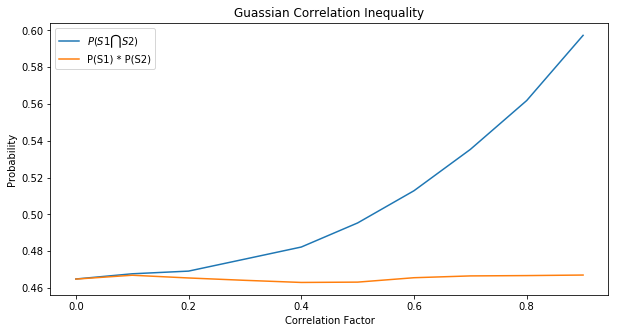

<IPython.core.display.Javascript object>

In [234]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1, 0.1), lhs, label=r"$P(S1 \bigcap S2)$")
plt.plot(np.arange(0, 1, 0.1), rhs, label="P(S1) * P(S2)")

plt.xlabel("Correlation Factor")
plt.ylabel("Probability")

plt.title("Guassian Correlation Inequality")
plt.legend(loc="upper left")

Extending Average User Fallacy to n dimensions

In [250]:
ndim = 4
np.random.random(((ndim ** 2 - ndim) // 2) - 1)

array([0.87481697, 0.96458805, 0.39975153, 0.60033484, 0.66967534])

<IPython.core.display.Javascript object>

In [255]:
rhs, lhs = [0.66], [0.66]
k = 1
for ndim in range(2, 10):
    # Sometimes cholesky decomposition is unsolvable.
    # In that case restart the random process
    while True:
        try:
            if ndim > 3:
                corr_values = np.random.random(((ndim ** 2 - ndim) // 2) - 1)
            else:
                corr_values = (
                    np.random.random(3) if ndim == 3 else np.random.random(1)
                )
            corr_matrix = np.identity(ndim)

            for row in range(0, ndim):
                for col in range(0, ndim):
                    if row != col:
                        corr_matrix[row][col] = corr_values[row + col - 1]

            chol = np.linalg.cholesky(corr_matrix)
            break
        except np.linalg.LinAlgError as err:
            continue

    mean = 0
    std = 2.5

    uncorr_data = data = np.reshape(
        np.random.normal(mean, std, size=ndim * samples), (ndim, samples)
    )
    corr_data = chol @ uncorr_data

    bool_array = np.zeros(shape=(ndim, samples))
    for i in range(ndim):
        # check if every dimension is within 1 standard deviation
        bool_array[i] = (corr_data[i] > (mean - k)) & (
            corr_data[i] < (mean + k)
        )

    all_normal = np.all(bool_array, axis=0)

    lhs.append(np.sum(all_normal) / samples)
    rhs.append(np.prod(np.sum(bool_array, axis=1) / samples))

<IPython.core.display.Javascript object>

In [256]:
chol = np.linalg.cholesky(corr_matrix)

uncorr_data = data = np.reshape(
    np.random.normal(mean, std, size=ndim * samples), (ndim, samples)
)
corr_data = chol @ uncorr_data

for i in range(ndim):
    # check if every dimension is within k standard deviation
    bool_array[i] = (corr_data[i] > (mean - k)) & (corr_data[i] < (mean + k))

all_normal = np.all(bool_array, axis=0)

lhs.append(np.sum(all_normal) / samples)
rhs.append(np.prod(np.sum(bool_array, axis=1) / samples))

<IPython.core.display.Javascript object>

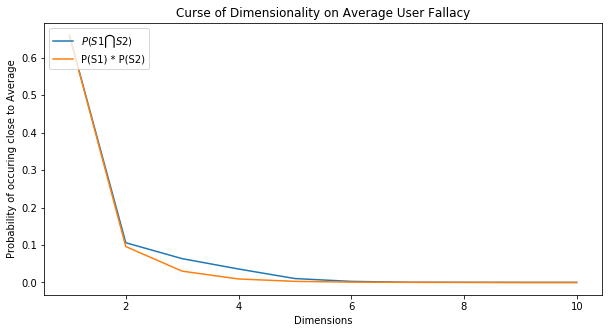

<IPython.core.display.Javascript object>

In [259]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), lhs, label=r"$P(S1 \bigcap S2)$")
plt.plot(range(1, 11), rhs, label="P(S1) * P(S2)")

plt.xlabel("Dimensions")
plt.ylabel("Probability of occuring close to Average")

plt.title("Curse of Dimensionality on Average User Fallacy")
plt.legend(loc="upper left")

In [254]:
0.63 * 0.63

0.39690000000000003

<IPython.core.display.Javascript object>